In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

In [2]:
us = pd.read_csv("/covid-19-data-master/us.csv")

In [3]:
county = pd.read_csv("/covid-19-data-master/us-counties.csv")

In [4]:
state = pd.read_csv("/covid-19-data-master/us-states.csv")

In [5]:
us.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [6]:
us.describe()

,cases,deaths
count,1.920000e+02,192.000000
mean,1.242171e+06,59161.593750
std,1.297242e+06,55815.913195
min,1.000000e+00,0.000000
25%,6.977500e+02,25.000000
50%,9.575535e+05,53953.500000
75%,2.068326e+06,114932.000000
max,4.502549e+06,152431.000000


In [7]:
us.isnull().any()

date      False
cases     False
deaths    False
dtype: bool

In [8]:
us['date'] = us['date'].str.replace("2020-", "")
us.head()

,date,cases,deaths
0,01-21,1,0
1,01-22,1,0
2,01-23,1,0
3,01-24,2,0
4,01-25,3,0


In [9]:
print(us['cases'].max())
print(us['deaths'].max())

4502549
152431


In [10]:
print(us['date'].min())
print(us['date'].max())

01-21
07-30


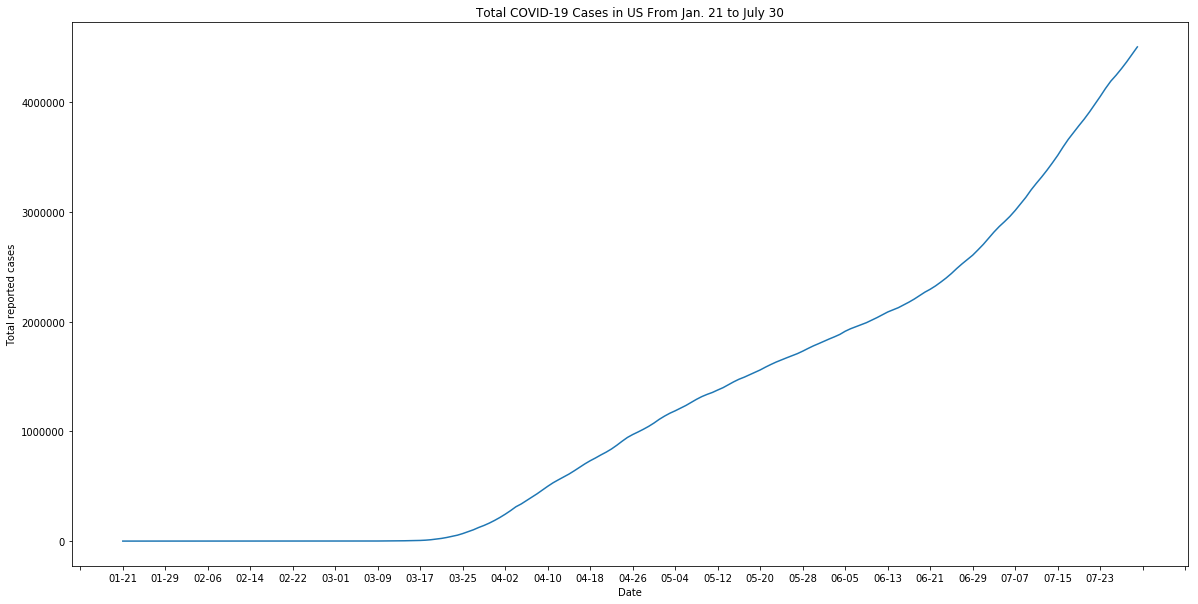

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(us['date'], us['cases'])
plt.xlabel("Date")
plt.ylabel("Total reported cases")
plt.title("Total COVID-19 Cases in US From Jan. 21 to July 30")
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.show()

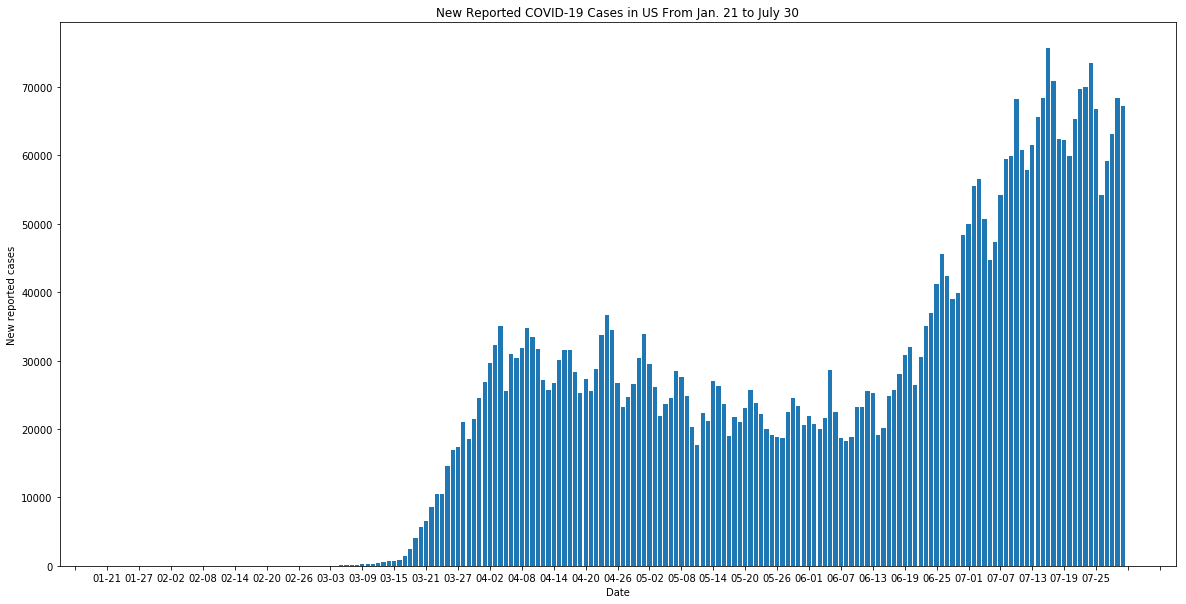

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(us['date'], us['cases'].diff())
plt.xlabel("Date")
plt.ylabel("New reported cases")
plt.title("New Reported COVID-19 Cases in US From Jan. 21 to July 30")
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.show()

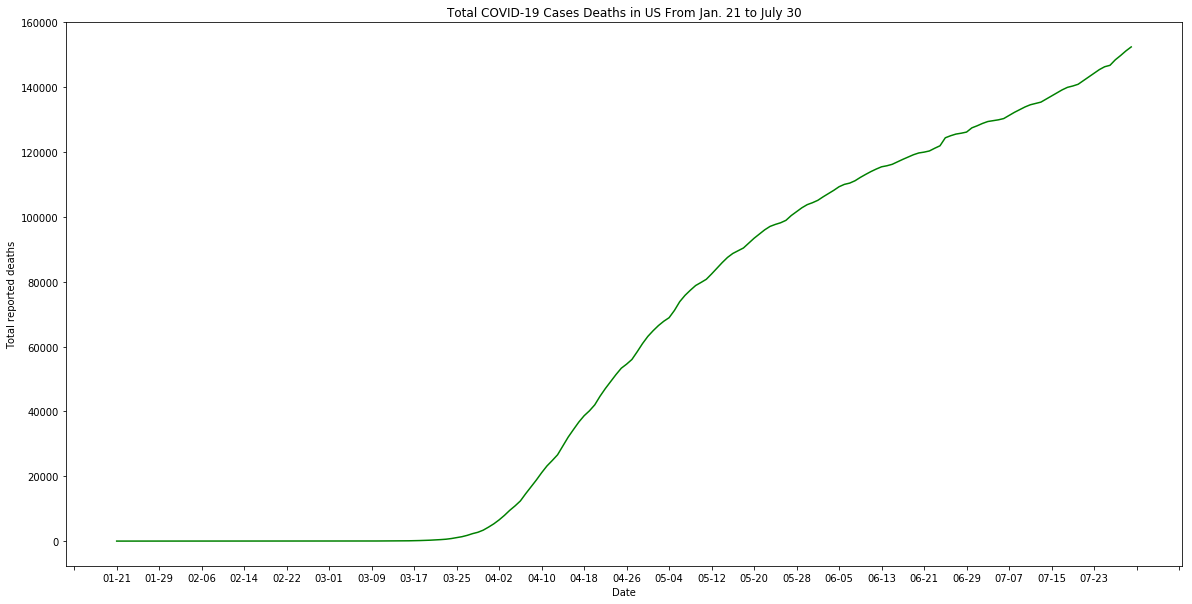

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(us['date'], us['deaths'], color='green')
plt.xlabel("Date")
plt.ylabel("Total reported deaths")
plt.title("Total COVID-19 Cases Deaths in US From Jan. 21 to July 30")
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.show()

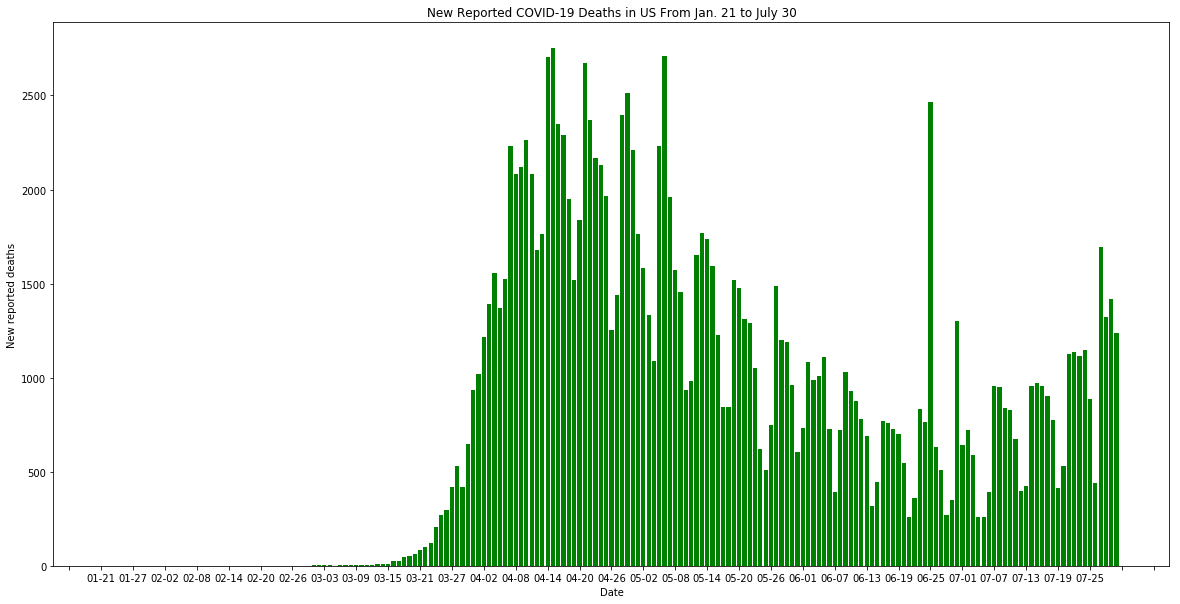

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(us['date'], us['deaths'].diff(), color="green")
plt.xlabel("Date")
plt.ylabel("New reported deaths")
plt.title("New Reported COVID-19 Deaths in US From Jan. 21 to July 30")
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.show()

In [15]:
us['mort'] = us['deaths']/us['cases']*100
us.head()

,date,cases,deaths,mort
0,01-21,1,0,0.0
1,01-22,1,0,0.0
2,01-23,1,0,0.0
3,01-24,2,0,0.0
4,01-25,3,0,0.0


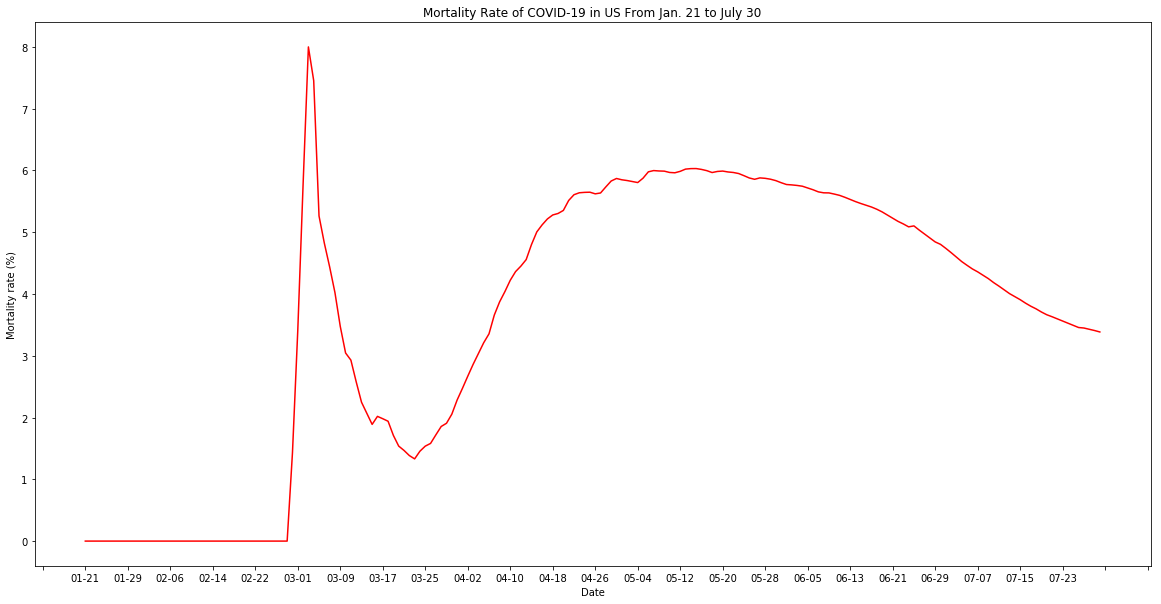

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(us['date'], us['mort'], color='red')
plt.xlabel("Date")
plt.ylabel("Mortality rate (%)")
plt.title("Mortality Rate of COVID-19 in US From Jan. 21 to July 30")
ax.xaxis.set_major_locator(plt.MaxNLocator(35))
plt.show()

In [17]:
state.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [18]:
state.isnull().any()

date      False
state     False
fips      False
cases     False
deaths    False
dtype: bool

In [19]:
state.describe()

,fips,cases,deaths
count,8264.000000,8264.000000,8264.000000
mean,31.768030,28859.731607,1374.519119
std,18.563556,61065.126012,3754.525844
min,1.000000,1.000000,0.000000
25%,17.000000,736.500000,12.000000
50%,31.000000,6323.500000,180.000000
75%,46.000000,29468.500000,1006.000000
max,78.000000,494269.000000,32362.000000


In [20]:
state['date'] = state['date'].str.replace("2020-", "")
state.head()

,date,state,fips,cases,deaths
0,01-21,Washington,53,1,0
1,01-22,Washington,53,1,0
2,01-23,Washington,53,1,0
3,01-24,Illinois,17,1,0
4,01-24,Washington,53,1,0


In [21]:
state['date'].max()

'07-30'

In [22]:
state_total_cases = state[state['date']=='07-30'].groupby('state').agg({'cases':'sum'})
state_total_cases.head()

,cases
state,
Alabama,85762
Alaska,3557
Arizona,170905
Arkansas,41759
California,494269


In [23]:
state_total_cases_sorted= state_total_cases.sort_values('cases',ascending=False)
state_total_cases_sorted.head()

,cases
state,
California,494269
Florida,461371
Texas,432029
New York,419081
New Jersey,182845


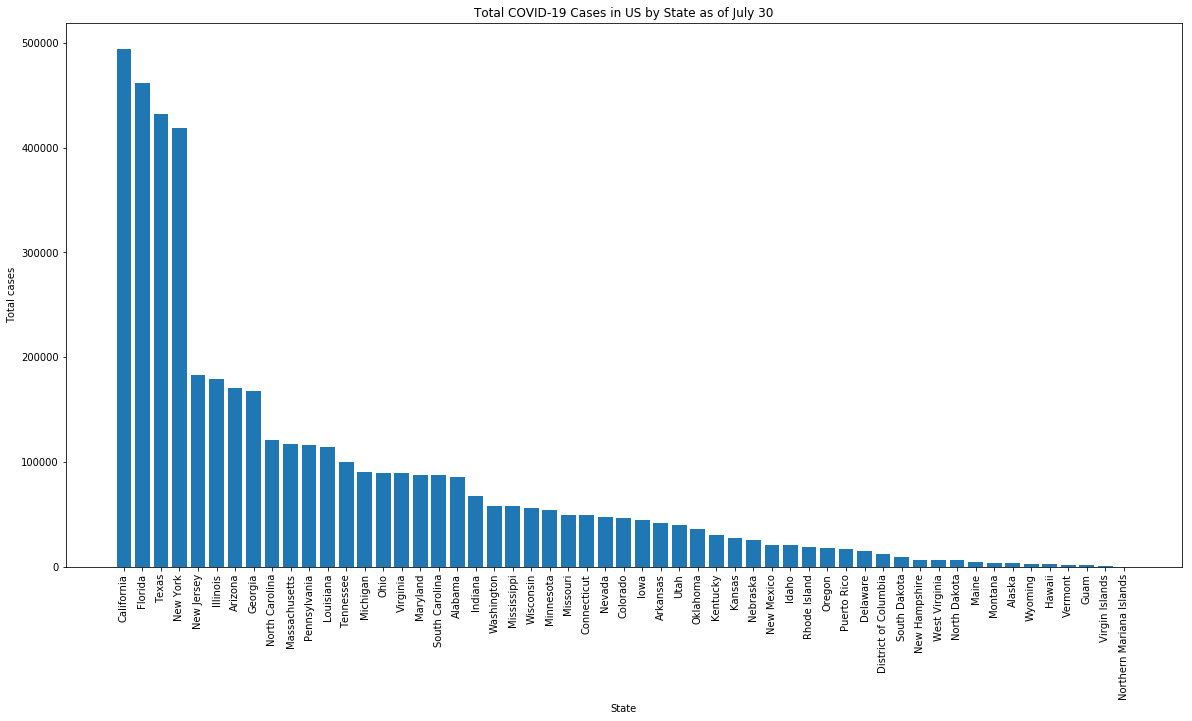

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(state_total_cases_sorted.index, state_total_cases_sorted['cases'])
plt.xlabel("State")
plt.ylabel("Total cases")
plt.title("Total COVID-19 Cases in US by State as of July 30")
plt.xticks(rotation=90)
plt.show()

In [25]:
state_total_deaths = state[state['date']=='07-30'].groupby('state').agg({'deaths':'sum'})
state_total_deaths_sorted= state_total_deaths.sort_values('deaths',ascending=False)
state_total_deaths_sorted.head()

,deaths
state,
New York,32362
New Jersey,15809
California,9009
Massachusetts,8595
Illinois,7677


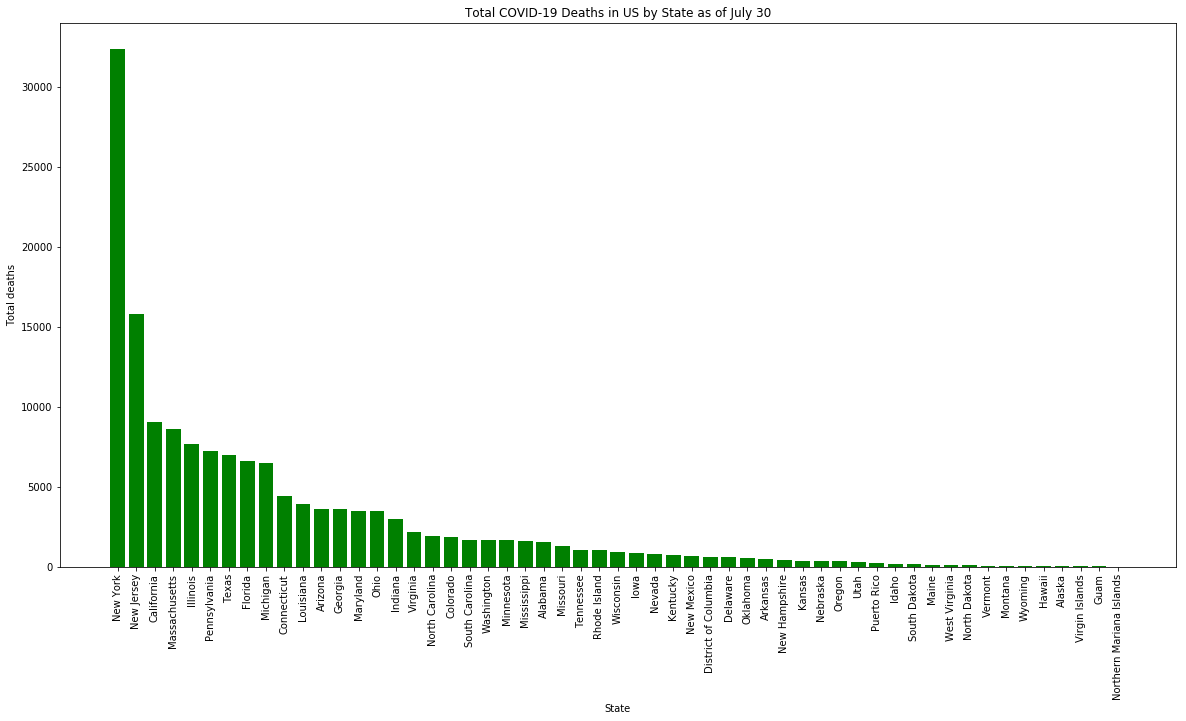

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(state_total_deaths_sorted.index, state_total_deaths_sorted['deaths'], color='green')
plt.xlabel("State")
plt.ylabel("Total deaths")
plt.title("Total COVID-19 Deaths in US by State as of July 30")
plt.xticks(rotation=90)
plt.show()

In [27]:
state_total_mort = state_total_deaths.copy()
state_total_mort['deaths'] = state_total_mort['deaths']/state_total_cases['cases']*100
state_total_mort.columns = ['mort']

In [28]:
state_total_mort.head()

,mort
state,
Alabama,1.824818
Alaska,0.590385
Arizona,2.122817
Arkansas,1.058454
California,1.822692


In [29]:
state_total_mort_sorted = state_total_mort.sort_values('mort',ascending=False)
state_total_mort_sorted.head()

,mort
state,
Connecticut,8.920878
New Jersey,8.646121
New York,7.722135
Massachusetts,7.340006
Michigan,7.168116


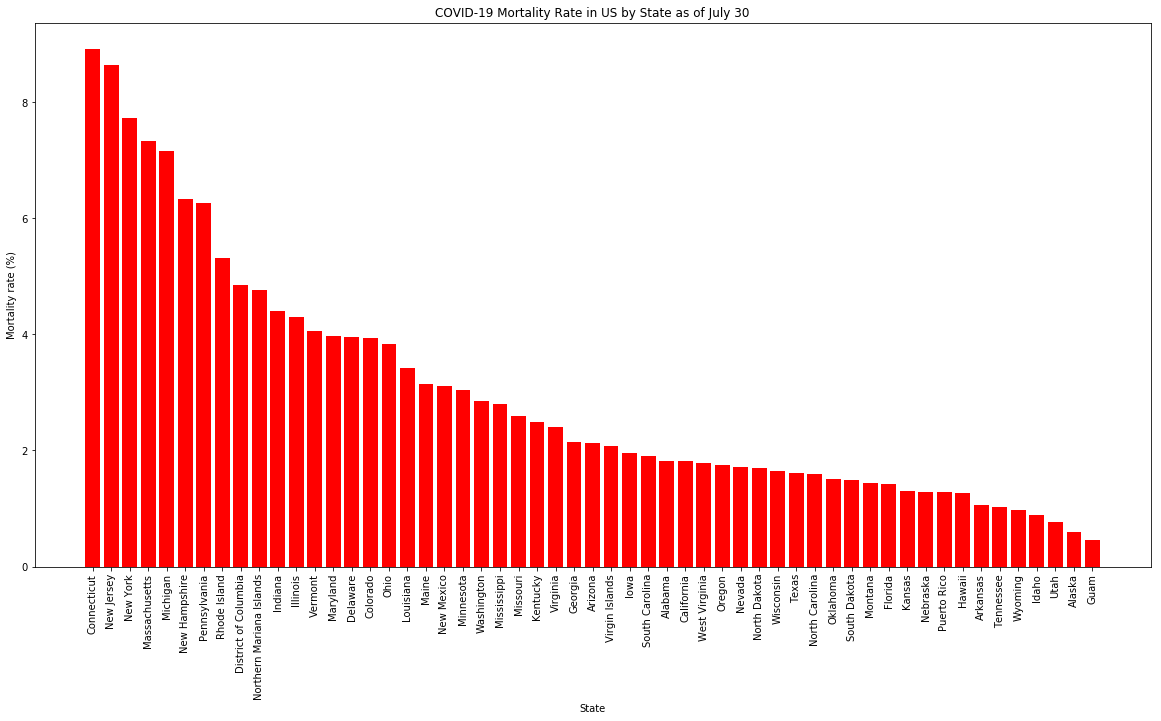

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(state_total_mort_sorted.index, state_total_mort_sorted['mort'], color='red')
plt.xlabel("State")
plt.ylabel("Mortality rate (%)")
plt.title("COVID-19 Mortality Rate in US by State as of July 30")
plt.xticks(rotation=90)
plt.show()

In [31]:
state_total_cases_sorted[:5]

,cases
state,
California,494269
Florida,461371
Texas,432029
New York,419081
New Jersey,182845


In [32]:
state_total_deaths_sorted[:5]

,deaths
state,
New York,32362
New Jersey,15809
California,9009
Massachusetts,8595
Illinois,7677


In [33]:
del state['fips']
california = state[state['state'] == "California"].copy()
florida = state[state['state'] == "Florida"].copy()
texas = state[state['state'] == "Texas"].copy()
new_york = state[state['state'] == "New York"].copy()
new_jersey = state[state['state'] == "New Jersey"].copy()
massachusetts = state[state['state'] == "Massachusetts"].copy()
illinois = state[state['state'] == "Illinois"].copy()

In [34]:
new_jersey.head()

,date,state,cases,deaths
292,03-04,New Jersey,1,0
312,03-05,New Jersey,2,0
337,03-06,New Jersey,4,0
368,03-07,New Jersey,4,0
403,03-08,New Jersey,6,0


In [35]:
to_merge = [california, florida, illinois, massachusetts, new_jersey, new_york, texas]
top_states = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='inner'), to_merge)
top_states.head()

,date,state_x,cases_x,deaths_x,state_y,cases_y,deaths_y,state_x,cases_x,deaths_x,...,deaths_y,state_x,cases_x,deaths_x,state_y,cases_y,deaths_y,state,cases,deaths
0,03-04,California,55,1,Florida,3,0,Illinois,4,0,...,0,New Jersey,1,0,New York,11,0,Texas,12,0
1,03-05,California,67,1,Florida,4,0,Illinois,5,0,...,0,New Jersey,2,0,New York,22,0,Texas,16,0
2,03-06,California,81,1,Florida,7,2,Illinois,6,0,...,0,New Jersey,4,0,New York,44,0,Texas,19,0
3,03-07,California,100,1,Florida,12,2,Illinois,6,0,...,0,New Jersey,4,0,New York,89,0,Texas,19,0
4,03-08,California,112,1,Florida,13,2,Illinois,7,0,...,0,New Jersey,6,0,New York,106,0,Texas,23,0


In [36]:
top_states.columns = ['date', 'state1', 'CA cases', 'CA deaths', 'state2', 'FL cases', 'FL deaths', 'state3', 'IL cases', 'IL deaths', 'state4', 'MA cases', 'MA deaths', 'state5', 'NJ cases', 'NJ deaths', 'state6', 'NY cases', 'NY deaths', 'state7', 'TX cases', 'TX deaths']
top_states.head()

,date,state1,CA cases,CA deaths,state2,FL cases,FL deaths,state3,IL cases,IL deaths,...,MA deaths,state5,NJ cases,NJ deaths,state6,NY cases,NY deaths,state7,TX cases,TX deaths
0,03-04,California,55,1,Florida,3,0,Illinois,4,0,...,0,New Jersey,1,0,New York,11,0,Texas,12,0
1,03-05,California,67,1,Florida,4,0,Illinois,5,0,...,0,New Jersey,2,0,New York,22,0,Texas,16,0
2,03-06,California,81,1,Florida,7,2,Illinois,6,0,...,0,New Jersey,4,0,New York,44,0,Texas,19,0
3,03-07,California,100,1,Florida,12,2,Illinois,6,0,...,0,New Jersey,4,0,New York,89,0,Texas,19,0
4,03-08,California,112,1,Florida,13,2,Illinois,7,0,...,0,New Jersey,6,0,New York,106,0,Texas,23,0


In [37]:
del top_states['state1']
del top_states['state2']
del top_states['state3']
del top_states['state4']
del top_states['state5']
del top_states['state6']
del top_states['state7']
top_states.head()

,date,CA cases,CA deaths,FL cases,FL deaths,IL cases,IL deaths,MA cases,MA deaths,NJ cases,NJ deaths,NY cases,NY deaths,TX cases,TX deaths
0,03-04,55,1,3,0,4,0,2,0,1,0,11,0,12,0
1,03-05,67,1,4,0,5,0,3,0,2,0,22,0,16,0
2,03-06,81,1,7,2,6,0,8,0,4,0,44,0,19,0
3,03-07,100,1,12,2,6,0,13,0,4,0,89,0,19,0
4,03-08,112,1,13,2,7,0,28,0,6,0,106,0,23,0


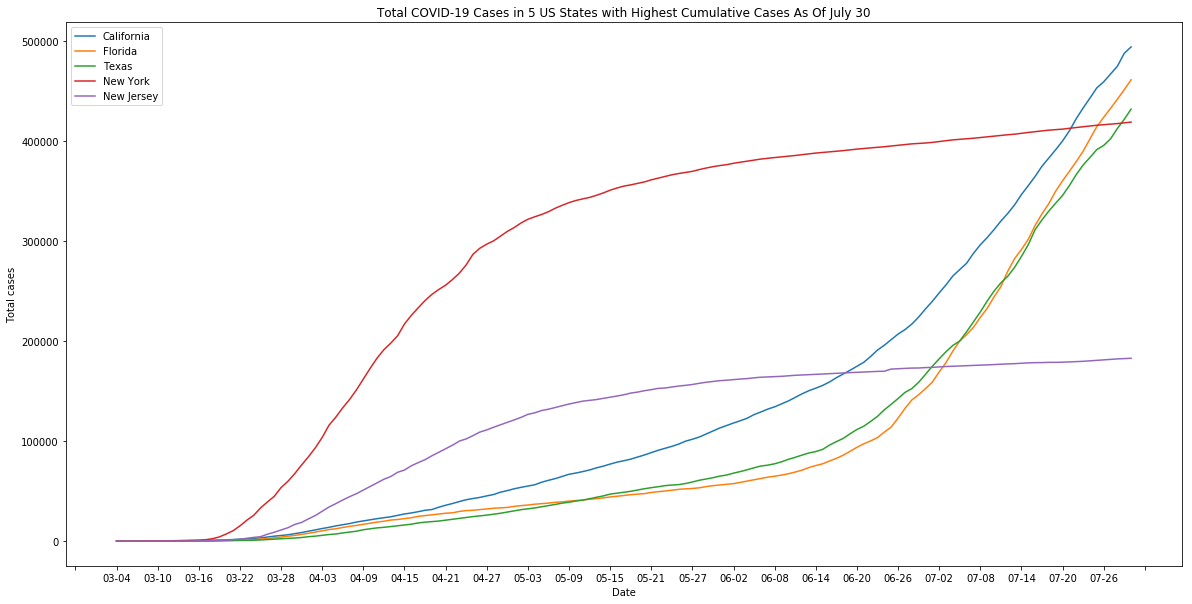

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(top_states['date'], top_states['CA cases'], label="California")
plt.plot(top_states['date'], top_states['FL cases'], label="Florida")
plt.plot(top_states['date'], top_states['TX cases'], label="Texas")
plt.plot(top_states['date'], top_states['NY cases'], label="New York")
plt.plot(top_states['date'], top_states['NJ cases'], label="New Jersey")
plt.xlabel("Date")
plt.ylabel("Total cases")
plt.title("Total COVID-19 Cases in 5 US States with Highest Cumulative Cases As Of July 30")
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

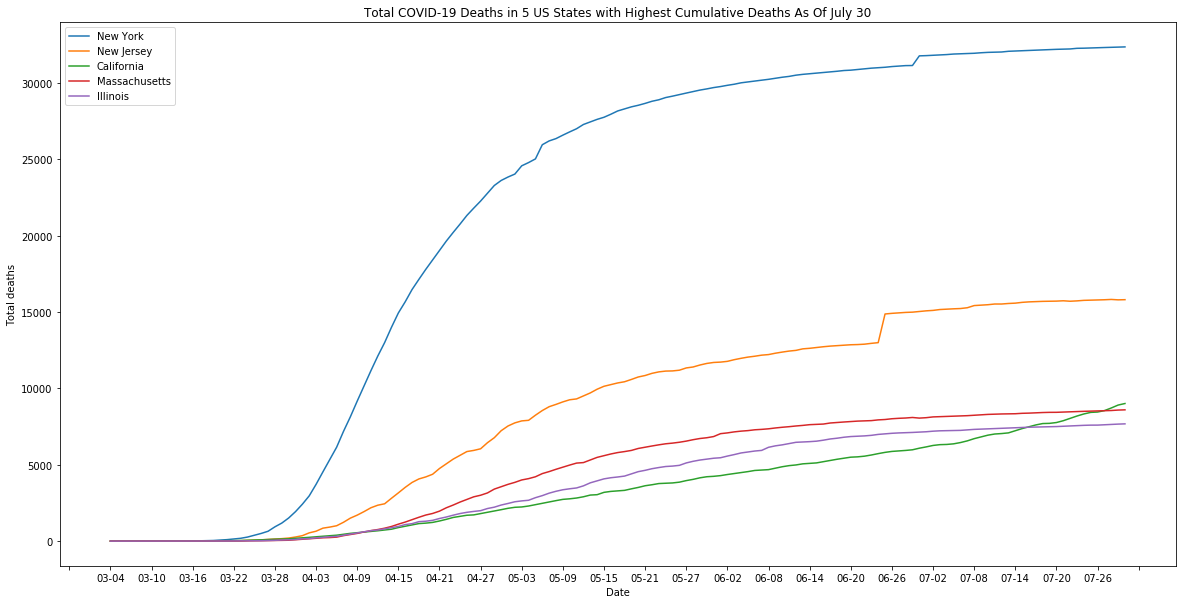

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(top_states['date'], top_states['NY deaths'], label="New York")
plt.plot(top_states['date'], top_states['NJ deaths'], label="New Jersey")
plt.plot(top_states['date'], top_states['CA deaths'], label="California")
plt.plot(top_states['date'], top_states['MA deaths'], label="Massachusetts")
plt.plot(top_states['date'], top_states['IL deaths'], label="Illinois")
plt.xlabel("Date")
plt.ylabel("Total deaths")
plt.title("Total COVID-19 Deaths in 5 US States with Highest Cumulative Deaths As Of July 30")
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

In [39]:
state.head()

,date,state,cases,deaths
0,01-21,Washington,1,0
1,01-22,Washington,1,0
2,01-23,Washington,1,0
3,01-24,Illinois,1,0
4,01-24,Washington,1,0


In [40]:
recent_state = state[state['date'] >= '07-01'].copy()
recent_state.head()

,date,state,cases,deaths
6614,07-01,Alabama,38962,972
6615,07-01,Alaska,1174,12
6616,07-01,Arizona,84152,1726
6617,07-01,Arkansas,21197,277
6618,07-01,California,239764,6168


In [41]:
county.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [42]:
county.isnull().any()

date      False
county    False
state     False
fips       True
cases     False
deaths    False
dtype: bool

In [43]:
del county['fips']

In [44]:
county['county_state'] = county['county'] + " Co., " + county["state"]
del county['county']
del county['state']
county.head()

,date,cases,deaths,county_state
0,2020-01-21,1,0,"Snohomish Co., Washington"
1,2020-01-22,1,0,"Snohomish Co., Washington"
2,2020-01-23,1,0,"Snohomish Co., Washington"
3,2020-01-24,1,0,"Cook Co., Illinois"
4,2020-01-24,1,0,"Snohomish Co., Washington"


In [45]:
county['date'] = county['date'].str.replace("2020-", "")
county.head()

,date,cases,deaths,county_state
0,01-21,1,0,"Snohomish Co., Washington"
1,01-22,1,0,"Snohomish Co., Washington"
2,01-23,1,0,"Snohomish Co., Washington"
3,01-24,1,0,"Cook Co., Illinois"
4,01-24,1,0,"Snohomish Co., Washington"


In [46]:
county_total_cases = county[county['date']=='07-30'].groupby('county_state').agg({'cases':'sum'})
county_total_cases.head()

,cases
county_state,
"Abbeville Co., South Carolina",285
"Acadia Co., Louisiana",2299
"Accomack Co., Virginia",1074
"Ada Co., Idaho",7691
"Adair Co., Iowa",20


In [47]:
county_total_cases_sorted = county_total_cases.sort_values('cases',ascending=False)
county_total_cases_sorted.head()

,cases
county_state,
"New York City Co., New York",229551
"Los Angeles Co., California",185872
"Miami-Dade Co., Florida",115915
"Maricopa Co., Arizona",114852
"Cook Co., Illinois",104691


In [56]:
county_total_cases_for_graph = county_total_cases_sorted[:20]
county_total_cases_for_graph.head()

,cases
county_state,
"New York City Co., New York",229551
"Los Angeles Co., California",185872
"Miami-Dade Co., Florida",115915
"Maricopa Co., Arizona",114852
"Cook Co., Illinois",104691


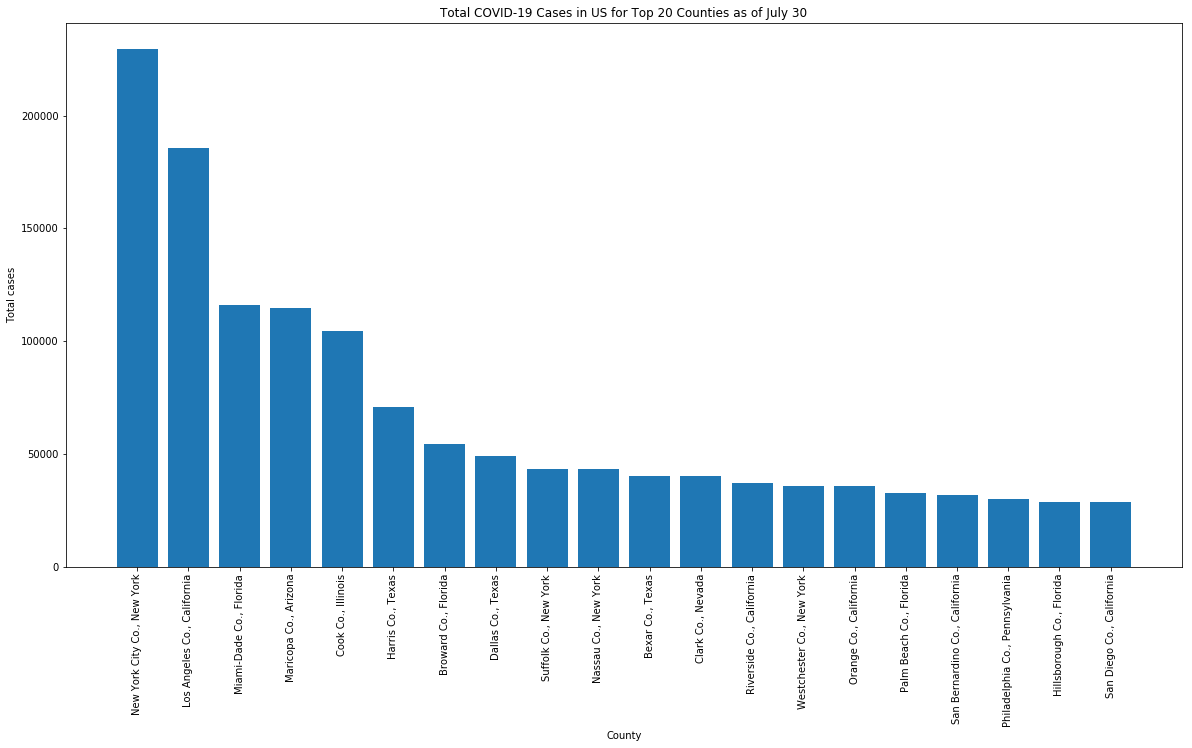

In [58]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(county_total_cases_for_graph.index, county_total_cases_for_graph['cases'])
plt.xlabel("County")
plt.ylabel("Total cases")
plt.title("Total COVID-19 Cases in US for Top 20 Counties as of July 30")
plt.xticks(rotation=90)
plt.show()

In [50]:
county_total_deaths = county[county['date']=='07-30'].groupby('county_state').agg({'deaths':'sum'})
county_total_deaths.head()

,deaths
county_state,
"Abbeville Co., South Carolina",7
"Acadia Co., Louisiana",71
"Accomack Co., Virginia",15
"Ada Co., Idaho",56
"Adair Co., Iowa",0


In [51]:
county_total_deaths_sorted = county_total_deaths.sort_values('deaths',ascending=False)
county_total_deaths_sorted.head()

,deaths
county_state,
"New York City Co., New York",22996
"Cook Co., Illinois",4872
"Los Angeles Co., California",4552
"Wayne Co., Michigan",2800
"Nassau Co., New York",2706


In [59]:
county_total_deaths_for_graph = county_total_deaths_sorted[:20]
county_total_deaths_for_graph

,deaths
county_state,
"New York City Co., New York",22996
"Cook Co., Illinois",4872
"Los Angeles Co., California",4552
"Wayne Co., Michigan",2800
"Nassau Co., New York",2706
"Essex Co., New Jersey",2100
"Suffolk Co., New York",2043
"Bergen Co., New Jersey",2040
"Maricopa Co., Arizona",2011


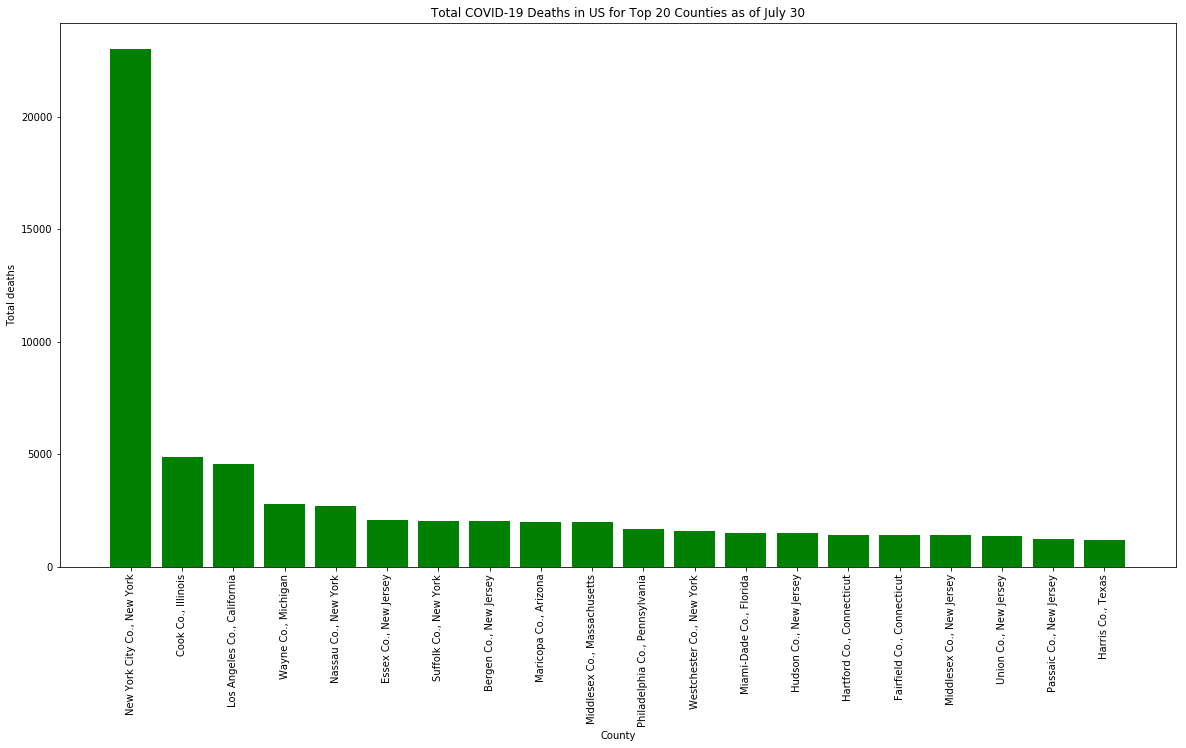

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(county_total_deaths_for_graph.index, county_total_deaths_for_graph['deaths'], color="green")
plt.xlabel("County")
plt.ylabel("Total deaths")
plt.title("Total COVID-19 Deaths in US for Top 20 Counties as of July 30")
plt.xticks(rotation=90)
plt.show()

In [66]:
nj = county[county['county_state'].str.contains("New Jersey")].copy()
nj.head()

,date,cases,deaths,county_state
517,03-04,1,0,"Bergen Co., New Jersey"
563,03-05,2,0,"Bergen Co., New Jersey"
624,03-06,3,0,"Bergen Co., New Jersey"
625,03-06,1,0,"Camden Co., New Jersey"
712,03-07,3,0,"Bergen Co., New Jersey"


In [67]:
nj.shape

(3073, 4)

In [69]:
nj.groupby('county_state')['cases'].max()

county_state
Atlantic Co., New Jersey       3346
Bergen Co., New Jersey        20667
Burlington Co., New Jersey     5772
Camden Co., New Jersey         8295
Cape May Co., New Jersey        808
Cumberland Co., New Jersey     3197
Essex Co., New Jersey         19684
Gloucester Co., New Jersey     3038
Hudson Co., New Jersey        19603
Hunterdon Co., New Jersey      1181
Mercer Co., New Jersey         8041
Middlesex Co., New Jersey     17832
Monmouth Co., New Jersey      10104
Morris Co., New Jersey         7260
Ocean Co., New Jersey         10424
Passaic Co., New Jersey       17535
Salem Co., New Jersey           872
Somerset Co., New Jersey       5243
Sussex Co., New Jersey         1330
Union Co., New Jersey         16746
Unknown Co., New Jersey        4866
Warren Co., New Jersey         1341
Name: cases, dtype: int64

In [70]:
nj['county_state'] = nj['county_state'].str.replace(" Co., New Jersey", "")
nj.head()

,date,cases,deaths,county_state
517,03-04,1,0,Bergen
563,03-05,2,0,Bergen
624,03-06,3,0,Bergen
625,03-06,1,0,Camden
712,03-07,3,0,Bergen


In [71]:
nj.columns = ['date', 'cases', 'deaths', 'county']
nj.head()

,date,cases,deaths,county
517,03-04,1,0,Bergen
563,03-05,2,0,Bergen
624,03-06,3,0,Bergen
625,03-06,1,0,Camden
712,03-07,3,0,Bergen


In [80]:
central_counties = ["Middlesex", "Monmouth", "Mercer", "Somerset", "Hunterdon", "Union", "Ocean"]
central_nj = nj.loc[nj['county'].isin(central_counties)].copy()
central_nj.head()

,date,cases,deaths,county
943,03-09,2,0,Monmouth
945,03-09,1,0,Union
1094,03-10,2,0,Monmouth
1096,03-10,1,0,Union
1276,03-11,2,0,Middlesex


In [81]:
central_nj.groupby('county')['cases'].max()

county
Hunterdon     1181
Mercer        8041
Middlesex    17832
Monmouth     10104
Ocean        10424
Somerset      5243
Union        16746
Name: cases, dtype: int64

In [74]:
central_nj.groupby('county')['deaths'].max()

county
Hunterdon     126
Mercer        612
Middlesex    1408
Monmouth      858
Ocean        1014
Somerset      558
Union        1349
Name: deaths, dtype: int64

In [82]:
middlesex = central_nj[central_nj['county'] == "Middlesex"].copy()
monmouth = central_nj[central_nj['county'] == "Monmouth"].copy()
mercer = central_nj[central_nj['county'] == "Mercer"].copy()
somerset = central_nj[central_nj['county'] == "Somerset"].copy()
hunterdon = central_nj[central_nj['county'] == "Hunterdon"].copy()
union = central_nj[central_nj['county'] == "Union"].copy()
ocean = central_nj[central_nj['county'] == "Ocean"].copy()

In [85]:
monmouth.head(10)

,date,cases,deaths,county
943,03-09,2,0,Monmouth
1094,03-10,2,0,Monmouth
1277,03-11,4,0,Monmouth
1507,03-12,5,0,Monmouth
1799,03-13,7,0,Monmouth
2146,03-14,8,1,Monmouth
2554,03-15,11,1,Monmouth
3011,03-16,14,1,Monmouth
3524,03-17,22,1,Monmouth
4120,03-18,32,1,Monmouth


In [83]:
to_merge = [monmouth, middlesex, mercer, somerset, hunterdon, union, ocean]
all_central_nj = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='inner'), to_merge)
all_central_nj.head()

,date,cases_x,deaths_x,county_x,cases_y,deaths_y,county_y,cases_x,deaths_x,county_x,...,county_y,cases_x,deaths_x,county_x,cases_y,deaths_y,county_y,cases,deaths,county
0,03-16,14,1,Monmouth,15,0,Middlesex,6,0,Mercer,...,Somerset,1,0,Hunterdon,8,0,Union,3,0,Ocean
1,03-17,22,1,Monmouth,20,0,Middlesex,9,0,Mercer,...,Somerset,4,0,Hunterdon,22,0,Union,4,0,Ocean
2,03-18,32,1,Monmouth,40,0,Middlesex,15,0,Mercer,...,Somerset,6,0,Hunterdon,26,0,Union,16,0,Ocean
3,03-19,43,1,Monmouth,64,0,Middlesex,20,0,Mercer,...,Somerset,8,0,Hunterdon,29,0,Union,33,0,Ocean
4,03-20,53,1,Monmouth,76,0,Middlesex,22,0,Mercer,...,Somerset,11,0,Hunterdon,43,0,Union,49,0,Ocean


In [87]:
all_central_nj.columns = ['date', "Monmouth_cases", "Monmouth_deaths", 'county1', "Middlesex_cases", "Middlesex_deaths", "county2", "Mercer_cases", "Mercer_deaths", "county3", "Somerset_cases", "Somerset_deaths", "county4", "Hunterdon_cases", "Hunterdon_deaths", "county5", "Union_cases", "Union_deaths", "county6", "Ocean_cases", "Ocean_deaths", "county7"]
all_central_nj.head()

,date,Monmouth_cases,Monmouth_deaths,county1,Middlesex_cases,Middlesex_deaths,county2,Mercer_cases,Mercer_deaths,county3,...,county4,Hunterdon_cases,Hunterdon_deaths,county5,Union_cases,Union_deaths,county6,Ocean_cases,Ocean_deaths,county7
0,03-16,14,1,Monmouth,15,0,Middlesex,6,0,Mercer,...,Somerset,1,0,Hunterdon,8,0,Union,3,0,Ocean
1,03-17,22,1,Monmouth,20,0,Middlesex,9,0,Mercer,...,Somerset,4,0,Hunterdon,22,0,Union,4,0,Ocean
2,03-18,32,1,Monmouth,40,0,Middlesex,15,0,Mercer,...,Somerset,6,0,Hunterdon,26,0,Union,16,0,Ocean
3,03-19,43,1,Monmouth,64,0,Middlesex,20,0,Mercer,...,Somerset,8,0,Hunterdon,29,0,Union,33,0,Ocean
4,03-20,53,1,Monmouth,76,0,Middlesex,22,0,Mercer,...,Somerset,11,0,Hunterdon,43,0,Union,49,0,Ocean


In [88]:
del all_central_nj['county1']
del all_central_nj['county2']
del all_central_nj['county3']
del all_central_nj['county4']
del all_central_nj['county5']
del all_central_nj['county6']
del all_central_nj['county7']
all_central_nj.head()

,date,Monmouth_cases,Monmouth_deaths,Middlesex_cases,Middlesex_deaths,Mercer_cases,Mercer_deaths,Somerset_cases,Somerset_deaths,Hunterdon_cases,Hunterdon_deaths,Union_cases,Union_deaths,Ocean_cases,Ocean_deaths
0,03-16,14,1,15,0,6,0,4,0,1,0,8,0,3,0
1,03-17,22,1,20,0,9,0,6,0,4,0,22,0,4,0
2,03-18,32,1,40,0,15,0,15,0,6,0,26,0,16,0
3,03-19,43,1,64,0,20,0,20,0,8,0,29,0,33,0
4,03-20,53,1,76,0,22,0,27,0,11,0,43,0,49,0


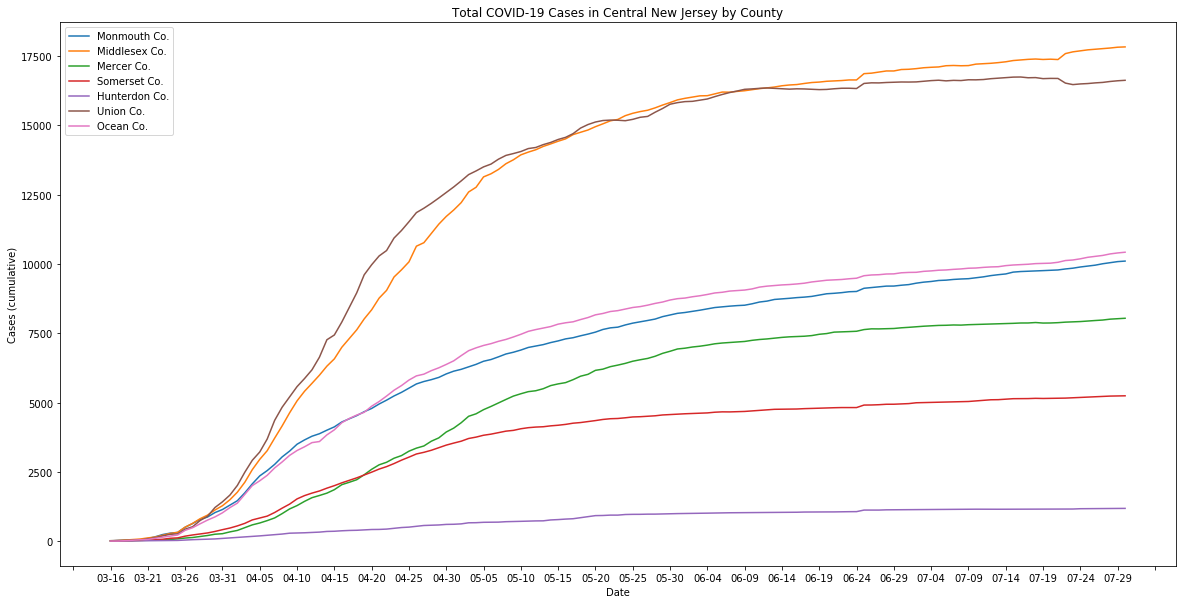

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(all_central_nj['date'], all_central_nj['Monmouth_cases'], label="Monmouth Co.")
plt.plot(all_central_nj['date'], all_central_nj['Middlesex_cases'], label="Middlesex Co.")
plt.plot(all_central_nj['date'], all_central_nj['Mercer_cases'], label="Mercer Co.")
plt.plot(all_central_nj['date'], all_central_nj['Somerset_cases'], label="Somerset Co.")
plt.plot(all_central_nj['date'], all_central_nj['Hunterdon_cases'], label="Hunterdon Co.")
plt.plot(all_central_nj['date'], all_central_nj['Union_cases'], label="Union Co.")
plt.plot(all_central_nj['date'], all_central_nj['Ocean_cases'], label="Ocean Co.")
plt.xlabel("Date")
plt.ylabel("Cases (cumulative)")
plt.title("Total COVID-19 Cases in Central New Jersey by County")
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

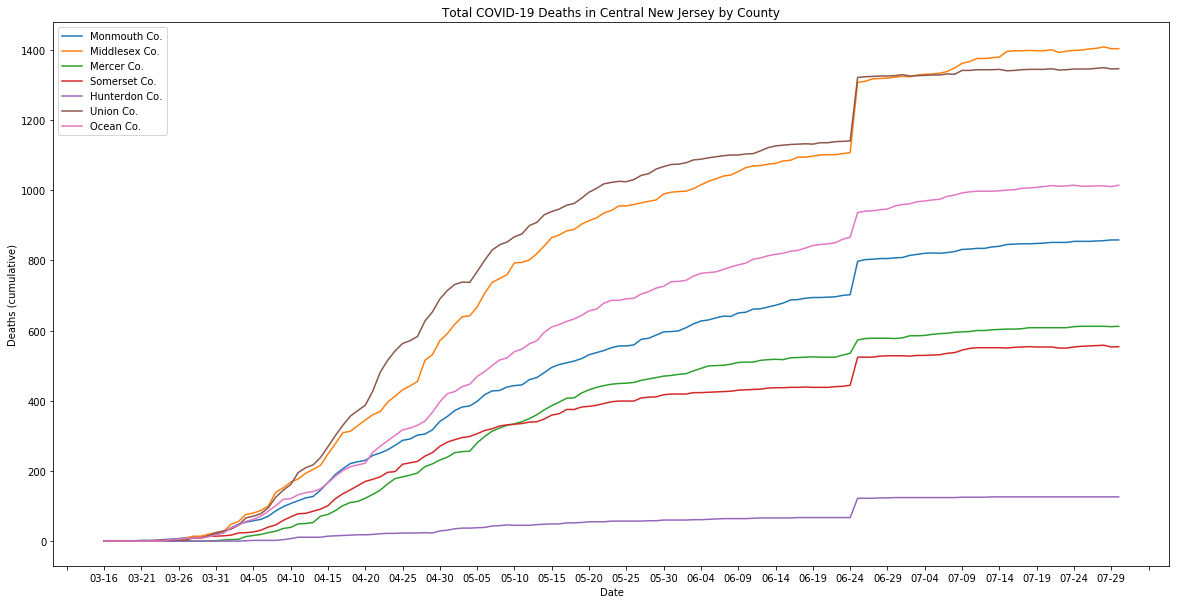

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(all_central_nj['date'], all_central_nj['Monmouth_deaths'], label="Monmouth Co.")
plt.plot(all_central_nj['date'], all_central_nj['Middlesex_deaths'], label="Middlesex Co.")
plt.plot(all_central_nj['date'], all_central_nj['Mercer_deaths'], label="Mercer Co.")
plt.plot(all_central_nj['date'], all_central_nj['Somerset_deaths'], label="Somerset Co.")
plt.plot(all_central_nj['date'], all_central_nj['Hunterdon_deaths'], label="Hunterdon Co.")
plt.plot(all_central_nj['date'], all_central_nj['Union_deaths'], label="Union Co.")
plt.plot(all_central_nj['date'], all_central_nj['Ocean_deaths'], label="Ocean Co.")
plt.xlabel("Date")
plt.ylabel("Deaths (cumulative)")
plt.title("Total COVID-19 Deaths in Central New Jersey by County")
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

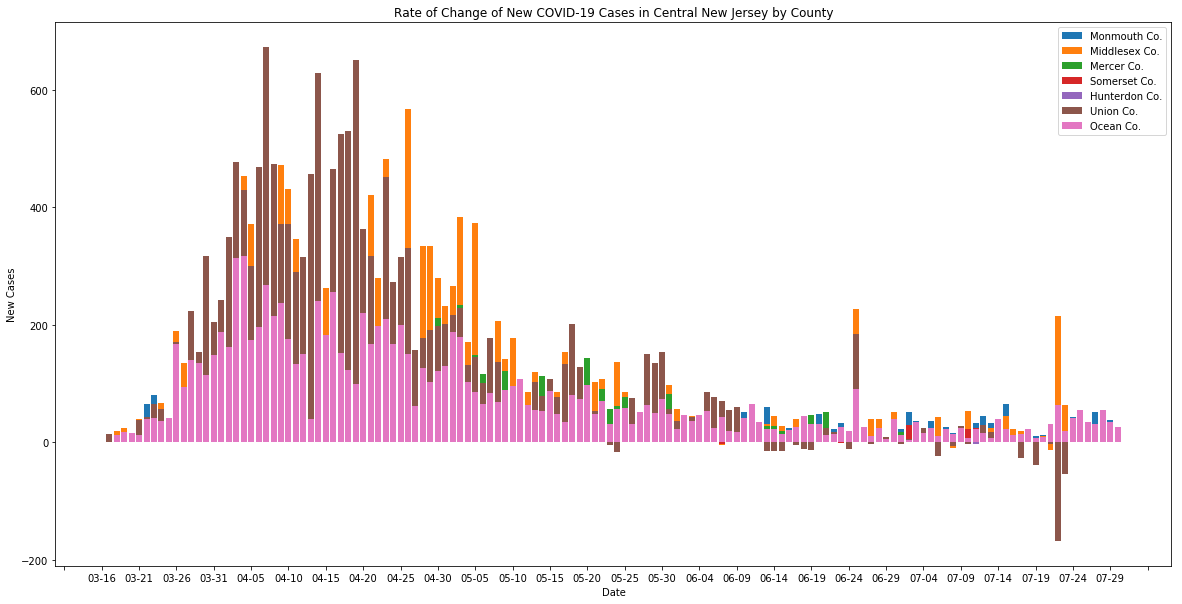

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(all_central_nj['date'], all_central_nj['Monmouth_cases'].diff(), label="Monmouth Co.")
plt.bar(all_central_nj['date'], all_central_nj['Middlesex_cases'].diff(), label="Middlesex Co.")
plt.bar(all_central_nj['date'], all_central_nj['Mercer_cases'].diff(), label="Mercer Co.")
plt.bar(all_central_nj['date'], all_central_nj['Somerset_cases'].diff(), label="Somerset Co.")
plt.bar(all_central_nj['date'], all_central_nj['Hunterdon_cases'].diff(), label="Hunterdon Co.")
plt.bar(all_central_nj['date'], all_central_nj['Union_cases'].diff(), label="Union Co.")
plt.bar(all_central_nj['date'], all_central_nj['Ocean_cases'].diff(), label="Ocean Co.")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Rate of Change of New COVID-19 Cases in Central New Jersey by County")
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()

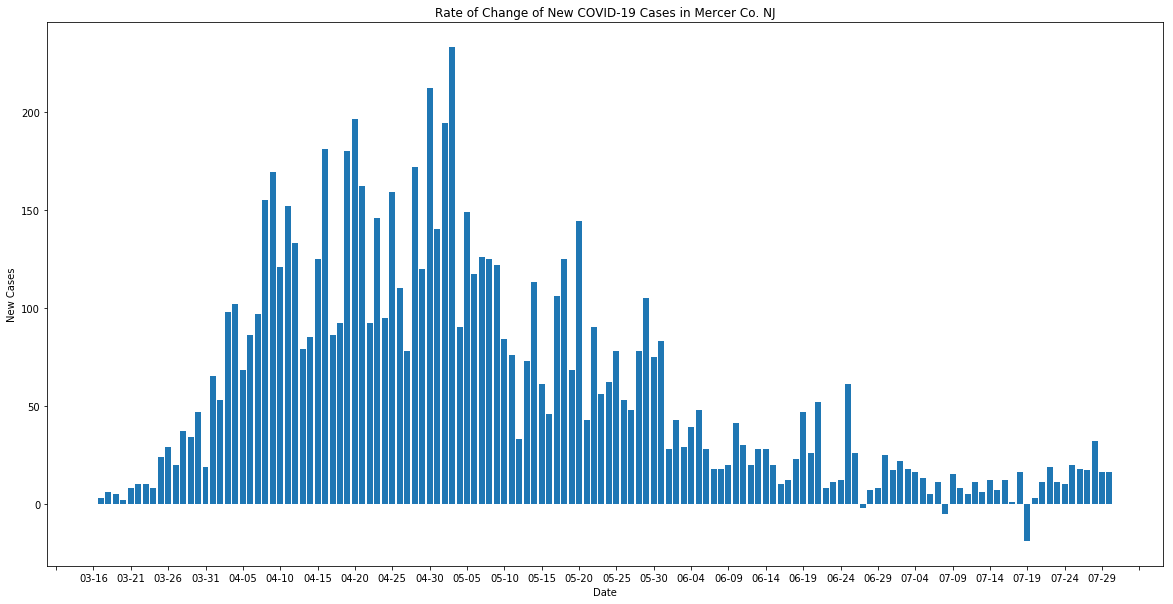

In [93]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(all_central_nj['date'], all_central_nj['Mercer_cases'].diff())
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Rate of Change of New COVID-19 Cases in Mercer Co. NJ")
ax.xaxis.set_major_locator(plt.MaxNLocator(30))
plt.show()